In [2]:
import numpy as np
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from numpy.linalg import norm

In [3]:
import main
data = main.load_data()

In [4]:
data_c1 = data[data[10]==1.0]
data_c0 = data[data[10]==0.0]
data_nn = data[data[9].notnull()]
data_c1_nn = data_nn[data_nn[10]==1.0]
data_c0_nn = data_nn[data_nn[10]==0.0]

In [5]:
%matplotlib inline
n_bins = 50

In [6]:
def histogram(axis, data = data, n_bins = n_bins):
    fig, axs = plt.subplots(1, 3, sharey=False)
    axs[0].hist(np.array(data.T)[axis], bins=n_bins)    
    axs[1].hist(np.array(data[data[10]==0.0].T)[axis], bins=n_bins)
    axs[2].hist(np.array(data[data[10]==1.0].T)[axis], bins=n_bins)




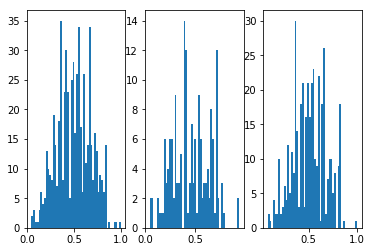

In [7]:
histogram(0)

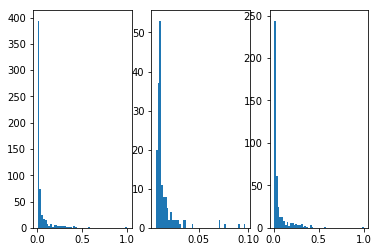

In [8]:
histogram(2)

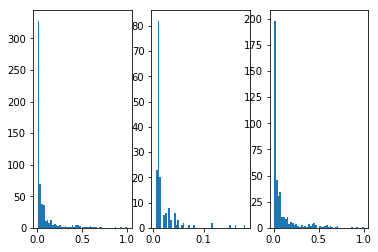

In [9]:
histogram(3)

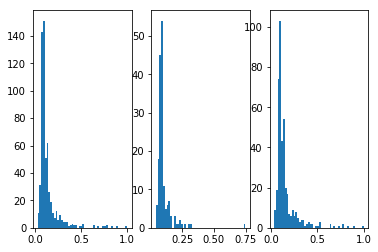

In [10]:
histogram(4)

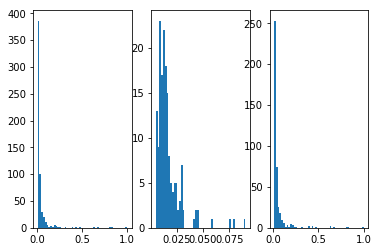

In [11]:
histogram(5)

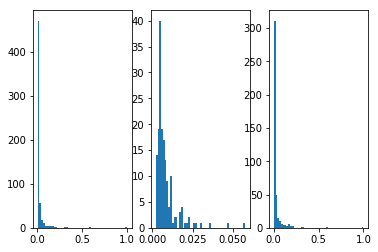

In [12]:
histogram(6)

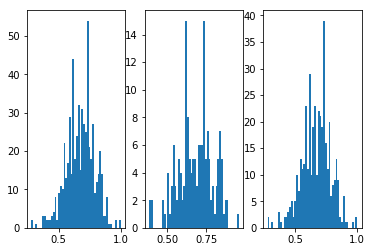

In [13]:
histogram(7)

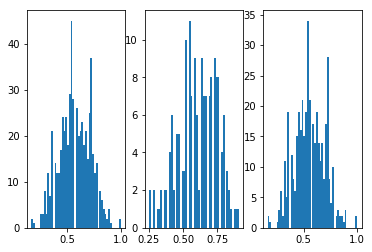

In [14]:
histogram(8)

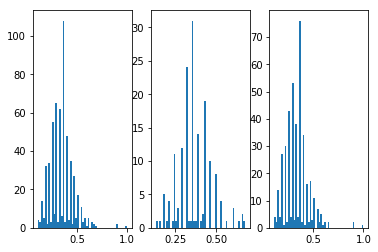

In [15]:
histogram(9, data_nn)

0 0


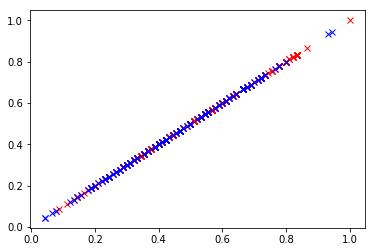

0 1


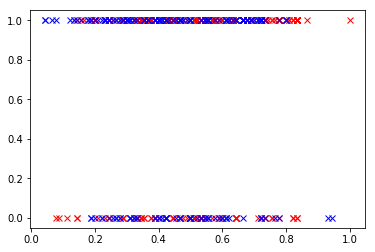

0 2


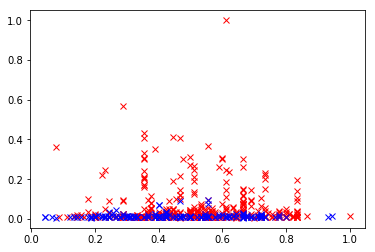

0 3


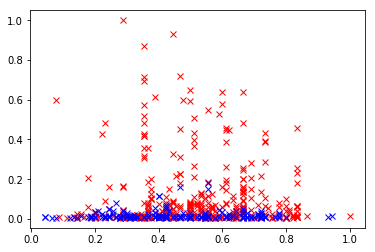

0 4


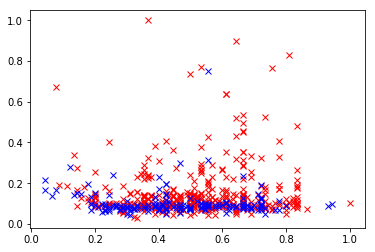

0 5


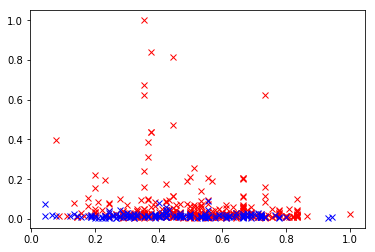

0 6


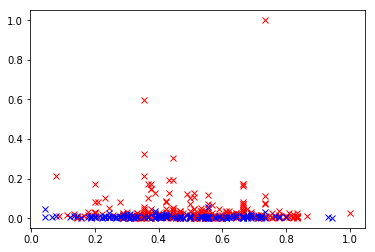

0 7


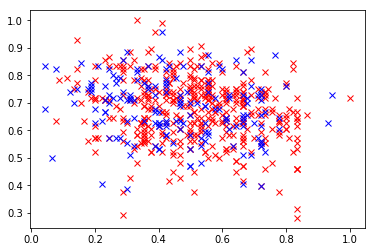

0 8


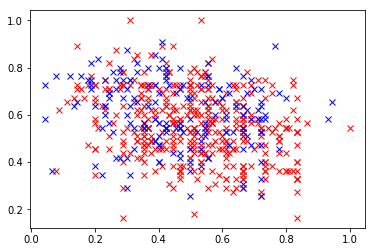

0 9


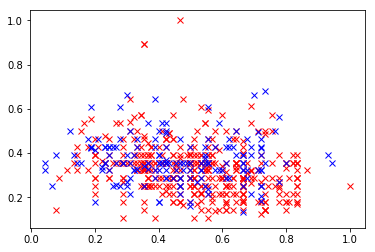

0 10


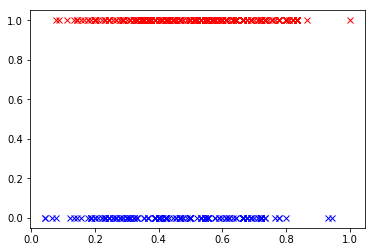

1 0


KeyboardInterrupt: 

In [16]:
def two_var_plot_color_by_class(it_1_var, it_2_var = -1, axs = -1):
    if(it_2_var==-1):
        it_2_var = it_1_var
    if axs == -1:
        
        plt.plot(data_c1[it_1_var], data_c1[it_2_var], 'rx', data_c0[it_1_var], data_c0[it_2_var], 'bx') 
    else:
        axs.plot(data_c1[it_1_var], data_c1[it_2_var], 'r^', data_c0[it_1_var], data_c0[it_2_var], 'b^') 

#fig, axs = plt.subplots(11, 11, sharey=False)
for it_1 in data:
    for it_2 in data:
        two_var_plot_color_by_class(it_1, it_2)
        print(str(it_1) + " " + str(it_2))
        plt.pause(0.01)
        

In [ ]:
two_var_plot_color_by_class(7,9) #2 i 3 zalezne  (7 i 8) ( 6 i 5) (9 i 8 => 9 aproksymujemy za pomocą 8)
# (0,7) -> kompletnie niezależne od siebie i klasy, 0,8 i 0.9, 9.7 mocno niezależne
# 9 jest skwantowane
# 2 i 3 i 6(choć gorzej) ma dobrą wartość diagnostyczną
# 4 i 5 raczej średnia
# 7,9 raczej słabo
# 8 jeszcze gorzej
# 7 i 9 lekka korelacja może być

In [ ]:
def normalize(vect):
    return vect/norm(vect)

def dot_product_mean(vect, data_tmp_c1 = data_c1_nn, func = np.mean):
    return func(list(map(lambda vect_c1, vect_c0 = vect: np.dot(normalize(vect_c1), normalize(vect_c0)), np.array(data_tmp_c1))))#-0.0000001


In [ ]:
# #wraz z atrybutem klasy co fauszuje trochę wynik
# list_of_dot_product_mean = list(map(lambda vect_c0: dot_product_mean(vect_c0) , np.array(data_c0_nn)))
# len(list_of_dot_product_mean)
# # list_of_dot_product_mean
# list_of_mean_angel_beetween_class_by_vect_from_class_0 = list((np.arccos(list_of_dot_product_mean)/np.pi*180))
# list_of_mean_angel_beetween_class_by_vect_from_class_0 

In [ ]:
# list_of_mean_angel_beetween_class_by_vect_from_class_0
# mean_angel_beetween_class = np.mean(list_of_mean_angel_beetween_class_by_vect_from_class_0)
# mean_angel_beetween_class

In [ ]:
def mean_angel_beetween_class(data_tmp_c0 = data_c0_nn, data_tmp_c1 = data_c1_nn, func = np.mean, fun_ret = np.mean):
    list_of_dot_product_mean = list(map(lambda vect_c0: dot_product_mean(vect_c0, data_tmp_c1, func) , np.array(data_tmp_c0)))
#     print(list_of_dot_product_mean)
    list_of_mean_angel_beetween_class_by_vect_from_class_0 = list((np.arccos(list_of_dot_product_mean)/np.pi*180))
    return fun_ret(list_of_mean_angel_beetween_class_by_vect_from_class_0)


In [ ]:
c1 = pd.DataFrame(np.array(data_c1_nn[data_c1_nn[1] >= 0.0])[:, 1:4]) #płeć mocno rozróżnia, [0] - wprowadza duży szum 8 9 i 10 też
# print(c1) 
c0 = pd.DataFrame (np.array(data_c0_nn[data_c0_nn[1] >= 0.0])[:, 1:4]) # na razie dobra rozróżnialność to 1:3 (49.32) 
def fun(dat):
    tmp = pd.DataFrame(dat).T
    plt.hist(tmp, bins = 10)
# print(mean_angel_beetween_class(c0, c1, np.mean, np.mean))
# print(mean_angel_beetween_class(c1, c1, np.mean, np.max))
# print(mean_angel_beetween_class(c0, c0, np.mean, np.max))


mean_angel_beetween_class(c0, c1, np.mean, fun)

In [ ]:
# data[list([1,2,3])]
# pd.DataFrame(np.array(data)[:, [0,2,5]])
np.arange(10)
def review_fun(data_in_fun):
    c1 = data_in_fun[data[10]==1.0]
    c0 = data_in_fun[data[10]==0.0]
    return mean_angel_beetween_class(c0, c1, np.mean, np.mean)

def find_best_next_atribut(indexes_to_use, indexes_added = [0,], best_indexes = [0,], best_value = 0):
    if len(indexes_to_use) <= 0:
        return (best_value, best_indexes) 
    change = False
#     print (indexes_to_use)
    for it, index in enumerate(indexes_to_use):
        indexes_added.append(index)
#         print(indexes_added)
#         print(pd.DataFrame(np.array(data)[:, indexes_added]))
        review_value = review_fun(pd.DataFrame(np.array(data_nn)[:, indexes_added]))
#         print(review_value)
        if review_value > best_value:
            best_value = review_value
            best_indexes = indexes_added[:]
            change = True
        indexes_added.pop()
    print(best_indexes)
    if change:
        indexes_to_use.remove(best_indexes[-1])
        return find_best_next_atribut(indexes_to_use, best_indexes, best_value = best_value, best_indexes = best_indexes)
    return (best_value, best_indexes) 
        
def find_best_in_startpoint(startpoint):
    indexes_to_use = list(range(10))
    indexes_to_use.remove(startpoint)
    best_indexes = [startpoint, ]
    indexes_added = [startpoint, ]
    return find_best_next_atribut(indexes_to_use, indexes_added, best_indexes)
    

In [ ]:

for it in list(range(10)):
    print("Wynik (startpoint: " + str(it) + "): " + str(find_best_in_startpoint(it)))

In [ ]:
# np.array([1,2]).concatenate(np.array([1,3]))
one = list(range(0, len(data)))
second = list(np.random.rand(len(data)))
x = np.concatenate((np.array([one]), np.array([second])), axis = 0)
lista = []
for el in x.transpose():
    lista.append((el[0], el[1]))
lista.sort(key=lambda x: x[1])

# print (lista)
indexes = list(map(lambda el: int(el[0]), lista))
print(indexes)

In [17]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.688889,1.0,0.145333,0.279188,0.331280,0.0320,0.020288,0.781250,0.581818,0.264286,1.0
1,0.688889,1.0,0.097333,0.208122,0.232227,0.0300,0.013796,0.729167,0.600000,0.317857,1.0
2,0.644444,1.0,0.013333,0.020305,0.086256,0.0070,0.004058,0.708333,0.618182,0.357143,1.0
3,0.800000,1.0,0.052000,0.101523,0.092417,0.0135,0.011970,0.760417,0.436364,0.142857,1.0
4,0.511111,1.0,0.024000,0.035533,0.098578,0.0095,0.002840,0.791667,0.800000,0.464286,1.0
5,0.288889,0.0,0.012000,0.010152,0.072986,0.0080,0.002435,0.729167,0.636364,0.357143,1.0
6,0.322222,0.0,0.012000,0.015228,0.095735,0.0070,0.002232,0.697917,0.654545,0.392857,1.0
7,0.188889,1.0,0.012000,0.015228,0.095735,0.0110,0.003855,0.770833,0.745455,0.428571,0.0
8,0.611111,1.0,0.009333,0.010152,0.137441,0.0265,0.011767,0.708333,0.618182,0.357143,1.0
9,0.633333,1.0,0.008000,0.005076,0.099526,0.0255,0.011970,0.614583,0.490909,0.285714,1.0
